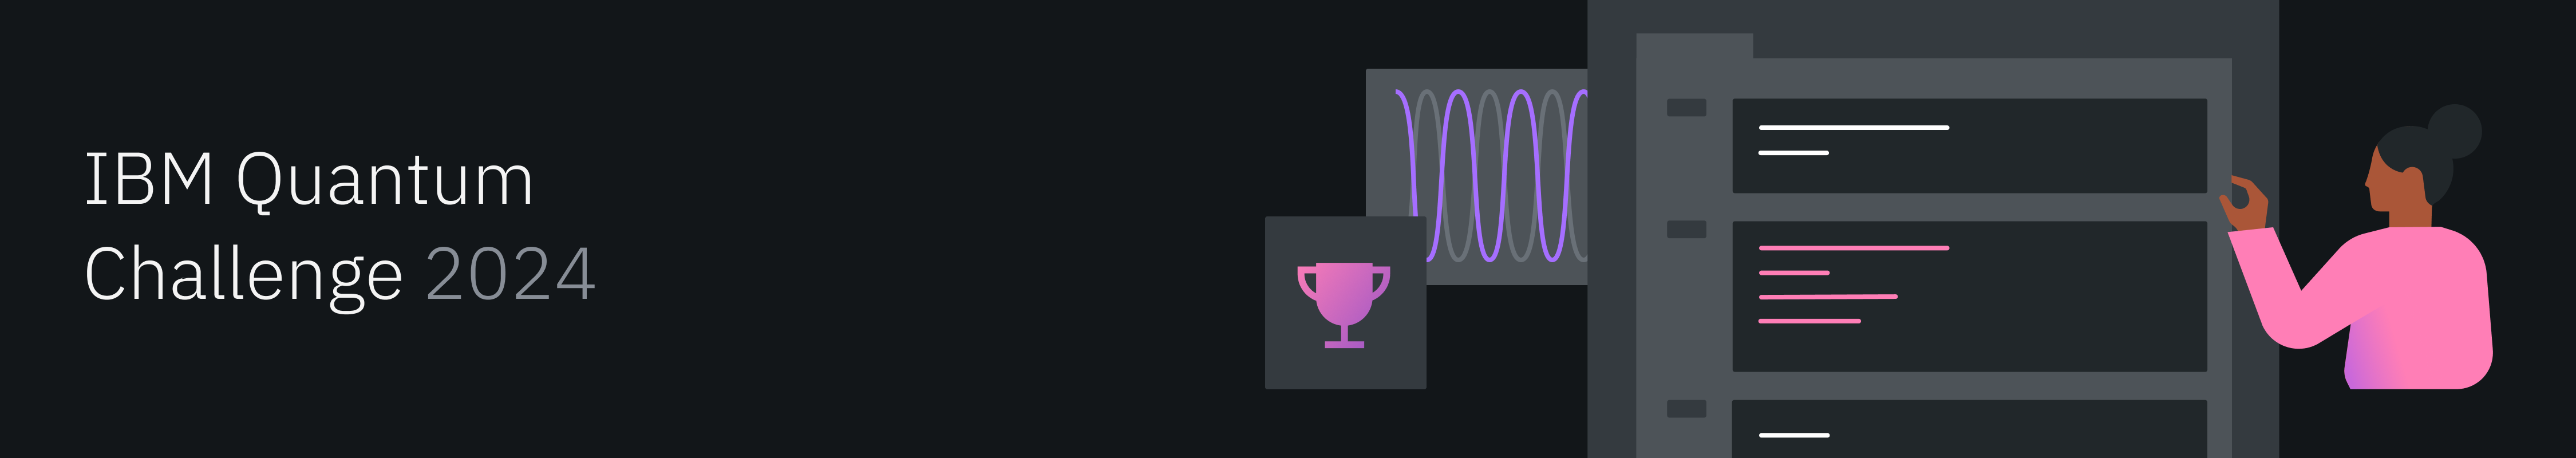

# Laboratorio 1: Introducción a Qiskit 1.0

# Tabla de contenido
- **[Introducción](##Introducción)**
- **[Parte I: estados Qiskit, lo nuevo y lo antiguo](#Parte-I:-Qiskit-states,-lo-nuevo-y-lo-antiguo)**
    - **[Ejercicio 1: Crear y dibujar un circuito de estado Bell](#Ejercicio1)**
    - **[Ejercicio 2: Utilizar Sampler.run](#Ejercicio2)**
    - **[Ejercicio 3: Crear y dibujar un circuito de estado W](#Ejercicio2)**    
- **[Parte II: VQE con Qiskit 1.0](#Part-II:-VQE-with-Qiskit-1.0)**
    - **[Ejercicio 4: Crear a parametrizar un circuito como ansatz](#Ejercicio4)**    
    - **[Ejercicio 5: Transpilar a circuitos ISA](#Ejercicio5)**  
    - **[Ejercicio 6: Definiendo la función de costes](#Ejercicio6)**  
    - **[Ejercicio 7: QiskitRuntimeService V2 primitivas, modo de testeo local y sesiones, una primera vista](#Ejercicio7)**


## Configuración

In [1]:
### Instale Qiskit, si es necesario

%pip install qiskit[visualization]==1.0.2
%pip install qiskit_aer
%pip install qiskit_ibm_runtime
%pip install matplotlib
%pip install pylatexenc
%pip install qiskit-transpiler-service
%pip install git+https://github.com/qiskit-community/Quantum-Challenge-Grader.git

  Cloning https://github.com/qiskit-community/Quantum-Challenge-Grader.git to /tmp/pip-req-build-3fjebxhh
  Running command git clone --filter=blob:none --quiet https://github.com/qiskit-community/Quantum-Challenge-Grader.git /tmp/pip-req-build-3fjebxhh
  Resolved https://github.com/qiskit-community/Quantum-Challenge-Grader.git to commit 4db06c25729efb615e1e800e2d83eab0e9291486
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.6/57.6 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.7/134.7 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.9/59.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.

In [2]:
### Guarde el token API

%set_env QXToken=75ca6ccd927a9d552250529f61ec06dffeae395f602a2ebb81e35178de034aadd046b96922df5af7bfc2093540d47bbfc845c1a8403395f2040c7ced66282ee0

# Asegúrese de que no haya espacio entre el signo igual
# y el comienzo de su token

env: QXToken=75ca6ccd927a9d552250529f61ec06dffeae395f602a2ebb81e35178de034aadd046b96922df5af7bfc2093540d47bbfc845c1a8403395f2040c7ced66282ee0


In [3]:
# Importaciones

import numpy as np
from typing import List, Callable
from scipy.optimize import minimize
from scipy.optimize._optimize import OptimizeResult
import matplotlib.pyplot as plt

from qiskit import QuantumCircuit
from qiskit.quantum_info import Statevector, Operator, SparsePauliOp
from qiskit.primitives import StatevectorSampler, PrimitiveJob
from qiskit.circuit.library import TwoLocal
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime.fake_provider import FakeSherbrooke
from qiskit_ibm_runtime import Session, EstimatorV2 as Estimator
from qiskit_aer import AerSimulator

In [4]:
# Configure el grader
from qc_grader.challenges.iqc_2024 import (
    grade_lab1_ex1,
    grade_lab1_ex2,
    grade_lab1_ex3,
    grade_lab1_ex4,
    grade_lab1_ex5,
    grade_lab1_ex6,
    grade_lab1_ex7,
)

## Introducción

Bienvenid@s a nuestro primer desafío! El primer desafío está diseñado para introducir las nuevas capacidades y funciones de Qiskit 1.0. 

Los siguientes desafíos tendrán un énfasis más profundo en estas capacidades e introducirán conceptos más complejos.
Durante este desafío reaprenderán como diseñar circuitos cuánticos con Qiskit y como implementar algoritmos de optimización utilizando un VQE (Variational Quantum Eigensolver).
Estos dos objetivos se llevarán a cabo en dos secciones:

1) Estados cuánticos con Qiskit, lo nuevo y lo antiguo
2) VQE con Qiskit 1.0

¡Empecemos!

## Parte I: Estados cuánticos con Qiskit, lo nuevo y lo antiguo

<a id="exercise1"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 1: Crear y dibujar un circuito de estado Bell</b> 

Los circuitos Bell son circuitos específicos que generan estados de Bell, o pares EPR, una tipo de vectores de base entrelazados y normalizados. En otras palabras, son los circuitos que utilizamos para generar estados entrelazados, un ingrediente clave en las recetas cuánticas.

Existen 4 estados de Bell. Puede aprender sobre cada uno en la [página conceptos básicos de información cuántica](https://learning.quantum.ibm.com/course/basics-of-quantum-information/multiple-systems#bell-states)


**Su tarea:** Construya un circuito que genere el estado Bell $| \psi ^- \rangle$.
    
</div>

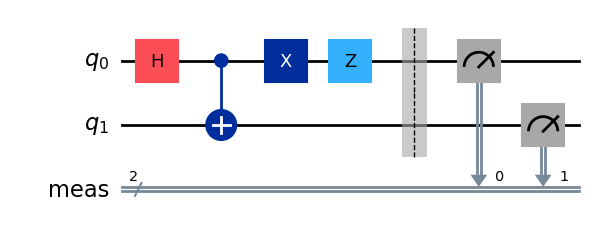

In [5]:
# Construya un circuito para formar un estado Bell psi-menos
# Aplique las puertas al circuito proporcionado, qc

qc = QuantumCircuit(2)

### Añada su código aquí ###
#Aplicamos una compuerta Hadamar
qc.h(0)
#Aplicamos una compuerta cx
qc.cx(0,1)
#Aplicamo la compuerta Z al primer qubit
qc.x(0)
qc.z(0)

### No cambie el programa más allá de esta línea ###
qc.measure_all()
qc.draw('mpl')

<div class="alert alert-block alert-warning">

**Pista:** El estado $| \psi ^- \rangle$ utiliza una sola puerta Z y una sola puerta X, las cuales ocurren después del CNOT.

</div>

In [6]:
# Envíe su respuesta usando el siguiente código

grade_lab1_ex1(qc) # Tipo de resultado esperado: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Para observar el estado entrelazado resultante que produce este circuito, ejecutaremos nuestro circuito varias veces y recopilaremos estadísticas sobre las medidas finales del cúbit. Ese es el objetivo del próximo ejercicio.

<a id="exercise2"></a>
<a name="exercise2"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 2: Utilizar Sampler.run</b> 
    
La primitiva [Qiskit Sampler](https://docs.quantum.ibm.com/api/qiskit/qiskit.primitives.StatevectorSampler) ([más información sobre Primitivas aquí](https://docs.quantum.ibm.com/run/primitives-get-started)) resulta en el tipo de salida especificada. Esto nos permite muestrear de manera eficiente estados cuánticos ejecutando circuitos cuánticos y proporcionando distribuciones de probabilidad de los estados cuánticos.

**Su tarea:** Utilize Qiskit StatevectorSampler para obtener las cuentas resultantes de nuestro circuito.
    
</div>

In [7]:
qc.measure_all()

### Añada su código aquí ###

# Instantiate a new statevector simulation based sampler object.
sampler = StatevectorSampler()
 
# Start a job that will return shots for all 100 parameter value sets.
pub = (qc)
job_sampler = sampler.run([pub], shots=256)
 

### No cambie el programa más allá de esta línea ###

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'01': 132, '10': 124}


In [8]:
# Envíe su respuesta usando el siguiente código

grade_lab1_ex2(job_sampler) # Tipo de resultado esperado: PrimitiveJob

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


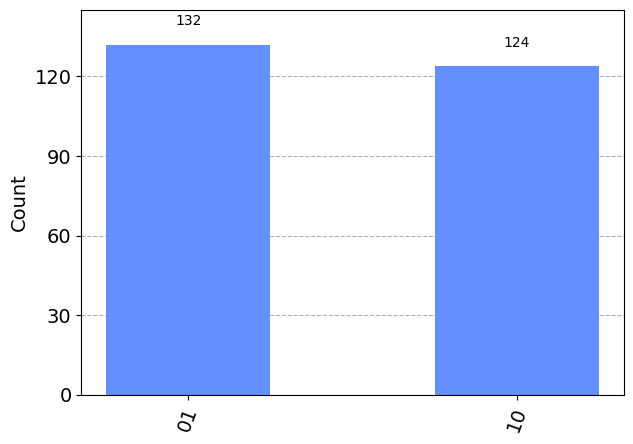

In [9]:
plot_histogram(counts_sampler)

El histograma muestra una probabilidad aproximadamente uniforme de encontrar nuestros cúbits en los estados `01` y `10`, lo que sugiere que el entrelazamiento se realizó como esperabamos.

<a id="exercise3"></a>
<a name="exercise3"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 3: Crear y dibujar un circuito de estado W</b> 
      
A continuación, desarrollaremos un circuito un poco más complicado. De manera similar al circuito Bell que produce estados Bell, los circuitos W producen estados W. Aunque los estados Bell entrelazan dos cúbits, los estados W entrelazan tres cúbits.
Para construir nuestro estado W, seguiremos 6 sencillos pasos:

1. Inicialice un circuito de 3 cúbits
2. Realice una rotación Ry en nuestro cúbit. Los detalles de esta operación son proporcionados.
3. Agregue una puerta hadamard controlada en el cúbit 1, con el cúbit de control 0
4. Agregue una puerta CNOT con el cúbit de control 1 y el cúbit de destino 2
5. Agregue una puerta CNOT con cúbit de control 0 y cúbit de destino 1
6. Agregue una puerta X en el cúbit 0

**Su tarea:** Sigua los pasos para construir el circuito del estado W.

</div>

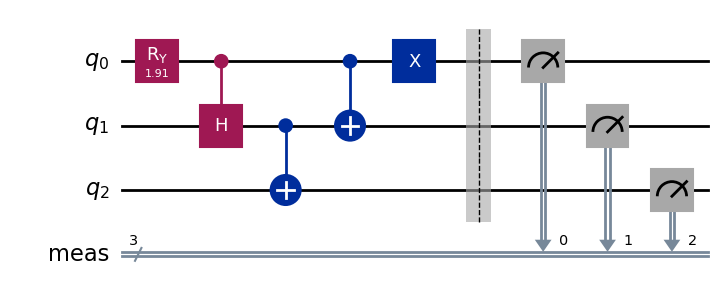

In [10]:
# Paso 1
qc = QuantumCircuit(3) #Añada su código aquí

# Paso 2 
qc.ry(1.91063324, 0)

# Paso 3
qc.ch(0,1)

# Paso 4
qc.cx(1,2)

#Paso 5
qc.cx(0,1)

#Paso 6
qc.x(0)




### No cambie el programa más allá de esta línea ###
qc.measure_all()
qc.draw('mpl')

In [11]:
# Envíe su respuesta usando el siguiente código

grade_lab1_ex3(qc) # Tipo de resultado esperado: QuantumCircuit

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Una vez más, visualicemos nuestros resultados:

In [12]:
sampler = StatevectorSampler()
pub = (qc)
job_sampler = sampler.run([pub], shots=10000)

result_sampler = job_sampler.result()
counts_sampler = result_sampler[0].data.meas.get_counts()

print(counts_sampler)

{'100': 3246, '001': 3329, '010': 3425}


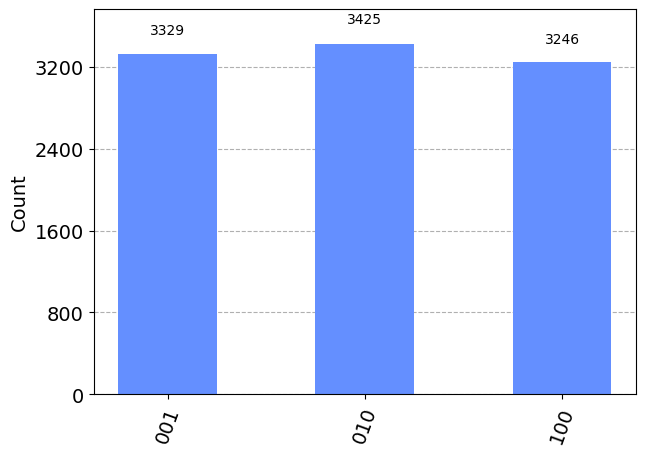

In [13]:
plot_histogram(counts_sampler)

Observamos nuestros recuentos totales distribuidos en tres contenedores de tamaño similar en tres estados, que son los tres estados deseados para la creación exitosa de un estado W. ¡Buen trabajo!

Ahora que tenemos los circuitos básicos, comenzaremos a introducir y desarrollar códigos más complejos con Qiskit 1.0.

## Parte II: VQE con Qiskit 1.0
<a name="pt2"></a>

El núcleo de este desafío aprovechará Qiskit Runtime y un Variational Quantum Eigensolver (VQE). Usaremos Qiskit Runtime Estimator para calcular los resultados esperados y Qiskit Runtime Sessions para facilitar la ejecución de un algoritmo VQE. El desafío se basa en el código que el físico experimental e investigador de IBM Quantum Nick Bronn creó para la [serie de videos Coding with Qiskit Runtime](https://www.youtube.com/playlist?list=PLOFEBzvs-VvqAC8DnVoLOzg2bKE4C7ARM), específicamente en el [Episodio 05 Primitivos y sesiones](https://youtu.be/yxuH8eb4MS4?si=e3trSORNjooWlQXu). Implementaremos este código utilizando la versión más reciente de Qiskit 1.0.

### Empecemos creando un operador Pauli
Un operador de Pauli es una matriz que representa un observable de la mecánica cuántica correspondiente a una medida del giro a lo largo de un eje particular (x, y, z). Construyamos uno:

In [14]:
pauli_op = SparsePauliOp(['ZII', 'IZI', 'IIZ','ZZZ','XIX'])
print(pauli_op.to_matrix())

[[ 4.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j]
 [ 0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  1.+0.j  0.+0.j  0.+0.j  0.+0.j  0.+0.j -4.+0.j]]


¡Te invitamos a experimentar con varios operadores Pauli y ver qué posibles combinaciones resultantes obtienes!

### Configurar y ejecutar un algoritmo VQE

Ahora comenzaremos a configurar nuestro algoritmo VQE. Los eigensolvers cuánticos variacionales (VQE) son algoritmos híbridos que utilizan técnicas cuánticas y clásicas para encontrar el estado fundamental de un sistema físico determinado. Se utilizan a menudo en química cuántica y problemas de optimización, y son candidatos prometedores para algoritmos híbridos en dispositivos ruidosos a corto plazo.

Los VQE se caracterizan por el uso de un algoritmo de optimización clásico para mejorar iterativamente una solución de prueba parametrizada, llamada "ansatz". El objetivo es resolver el estado fundamental de un hamiltoniano dado representado como una combinación lineal de términos de Pauli.

La ejecución de un algoritmo VQE requiere estos tres pasos:

1. Configuración del hamiltoniano y ansatz (especificación del problema)
2. Implementación del estimador Qiskit Runtime
3. Agregar el optimizador clásico y ejecutar nuestro programa.

Nosotros seguiremos estos pasos.

<a id="exercise4"></a>
<a name="exercise4"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 4: Crear a parametrizar un circuito como ansatz</b> 
    
Nuestra primera tarea será configurar nuestro ansatz, o una solución inicial, que utilizaremos como guía para perfeccionar y/o comparar nuestros resultados.

Para poder llevar esto acabo usaremos el circuito `TwoLocal` de Qiskit. `TwoLocal` es un circuito prediseñado que puede usarse para preparar funciones de onda de prueba para algoritmos cuánticos variacionales o circuitos de clasificación para aprendizaje automático. Los circuitos TwoLocal son circuitos parametrizados que constan de capas de rotación alternas y capas de entrelazamiento. Puede encontrar más información sobre ellos en la [documentación de Qiskit](https://docs.quantum.ibm.com/api/qiskit/circuit_library).

**Su tarea:** Configure un circuito TwoLocal de 3 cúbits usando rotaciones [Ry](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RYGate) y [Rz](https://docs.quantum.ibm.com/api/qiskit/qiskit.circuit.library.RZGate). El entrelazamiento debe configurarse al máximo y los bloques de entrelazamiento deben usar la puerta Cz. Asegúrese de configurar `reps=1` e `insert_barriers=True`.

</div>

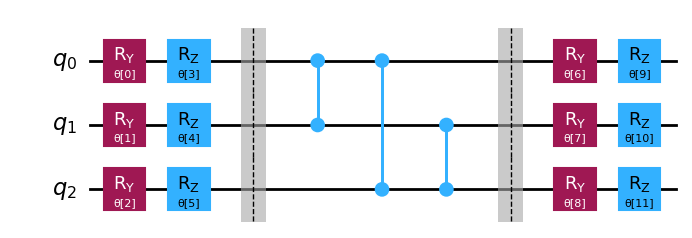

In [15]:
num_cúbits = 3#Añada su código aquí
rotation_blocks = ['ry','rz']  #Añada su código aquí
entanglement_blocks = 'cz' #Añada su código aquí
entanglement = 'full' #Añada su código aquí

ansatz = TwoLocal(num_cúbits, rotation_blocks, entanglement_blocks, entanglement, reps=1, insert_barriers=True)#Añada su código aquí


### No cambie el programa más allá de esta línea ###
ansatz.decompose().draw('mpl')

In [16]:
# Envíe Su respuesta usando el siguiente código

grade_lab1_ex4(num_cúbits, rotation_blocks, entanglement_blocks, entanglement) # Tipo de resultado esperado: int, List[str], str, str

Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


En la figura anterior vemos que nuestro circuito ansatz está definido por un vector de parámetros θ, con un número total de parámetros:

In [17]:
num_params = ansatz.num_parameters
num_params

12

<a id="exercise5"></a>
<a name="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 5: Transpilar a circuitos ISA </b> 
    
En este ejemplo usaremos [FakeSherbrooke](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.fake_provider.FakeSherbrooke), un backend falso (simulado) de 127 cúbits, utilizado para probar el transpilador y otras funcionalidades orientadas al backend.

Los administradores de pases preestablecidos son los administradores de pases predeterminados utilizados por la función `transpile()`. `transpile()` proporciona un método conveniente y simple para construir un objeto `PassManager` independiente que refleja lo que hace la función transpile al optimizar y transformar un circuito cuántico para su ejecución en un backend específico.

**Su tarea:** Defina el administrador de pases. Consulte la [documentación de Qiskit](https://docs.quantum.ibm.com/api/qiskit/0.42/qiskit.transpiler.preset_passmanagers.generate_preset_pass_manager) para obtener más información.

</div>

In [18]:
backend_answer = FakeSherbrooke() #Añada su código aquí
optimization_level_answer = 1 #Añada su código aquí 
pm = generate_preset_pass_manager(backend=backend_answer,optimization_level=optimization_level_answer)
isa_circuit =  pm.run(ansatz)#Añada su código aquí 

<div class="alert alert-block alert-info">
    
<b>Consejo: ¡Asegúrate de estar utilizando el backend correcto! </b>

El clasificador fue diseñado teniendo en cuenta **FakeSherbrooke** y, por lo tanto, espera un mapa de 127 cúbits. Si utiliza otro backend, puede tener problemas.

    
</div>

In [19]:
# Envíe su respuesta usando el siguiente código

grade_lab1_ex5(isa_circuit) # Tipo de resultado esperado: QuansumCircuit

Submitting your answer. Please wait...


Congratulations 🎉! Your answer is correct and has been submitted.


Con la versión más reciente de Qiskit Runtime, todos los circuitos enviados a un backend deben cumplir con las limitaciones del backend deseado. Se considera que dichos circuitos están escritos de manera compatible con la arquitectura del backend en uso ([Instruction Set Architecture - ISA](https://www.ibm.com/quantum/blog/isa-circuits?social_post=sf187802680&sf187802680=1)), es decir, con el conjunto de instrucciones que el dispositivo puede entender y ejecutar. Estas restricciones de destino se definen por factores como las puertas básicas nativas del dispositivo, su conectividad de cúbit y, cuando sea relevante, otras especificaciones relacionadas con la sincronización de la máquina.
Para visualizar nuestros circuitos ISA podemos ejecutar:

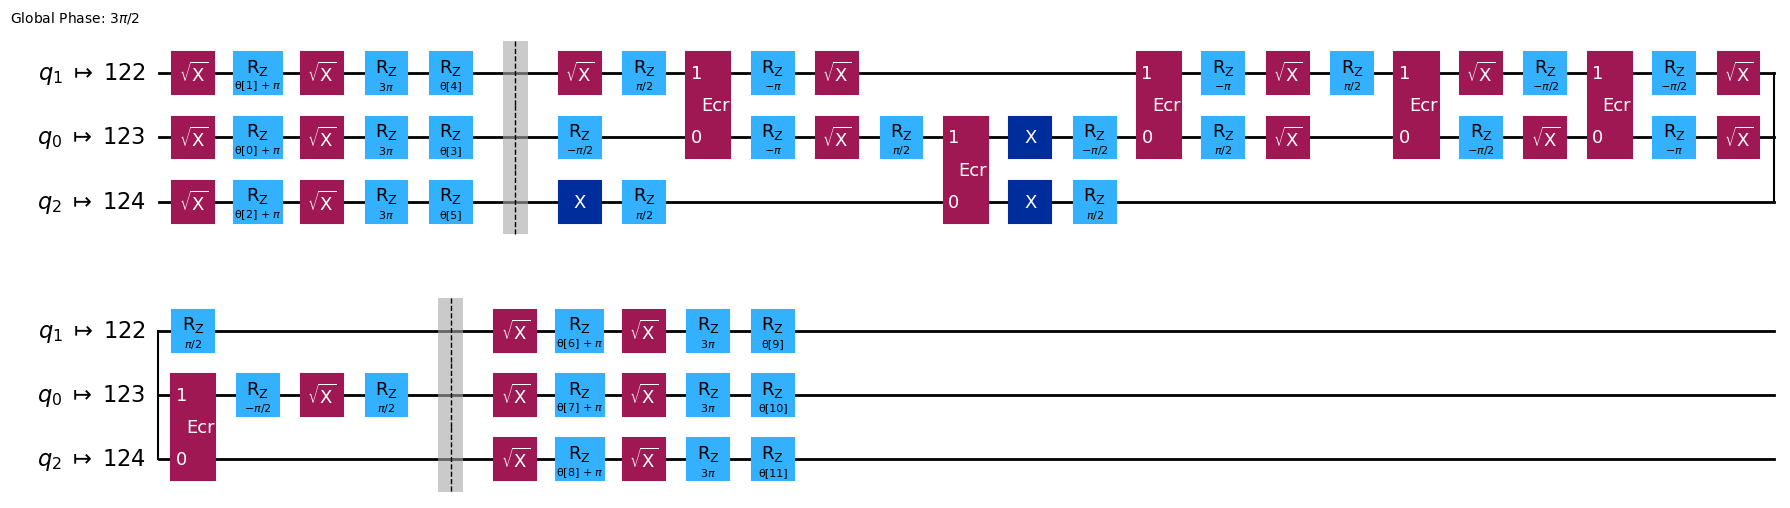

In [20]:
isa_circuit.draw('mpl', idle_wires=False,)

Después de la transpilación, el circuito solo contiene las puertas básicas nativas del backend. Para obtener más detalles sobre los circuitos ISA, consulte estos recursos del equipo de IBM:

- [What are ISA circuits?](https://www.ibm.com/quantum/blog/isa-circuits)
- [Understanding the new ISA circuits requirement](https://docs.quantum.ibm.com/announcements/news/2024-05-06-ISA-circuit-requirement#understanding-the-new-isa-circuits-requirement)

A continuación ejecuté el siguiente código para definir nuestro hamiltoniano y luego pasar al Ejercicio 6.

In [21]:
# Defina nuestro Hamiltoniano
hamiltonian_isa = pauli_op.apply_layout(layout=isa_circuit.layout)

In [22]:
import qiskit
qiskit.__version__

'1.0.2'

<div class="alert alert-block alert-info">
    
<b>Consejo: ¡Para los dos ejercicios siguientes, asegúrese de estar trabajando con Qiskit 1.0.2! </b>

Puede descargar esta versión usando: **%pip install qiskit==1.0.2**

    
</div>

<a id="exercise5"></a>
<a name="exercise5"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 6: Definiendo la función de costes </b> 
    
Como muchos problemas de optimización clásicos, la solución a un problema VQE se puede formular como la minimización de una función de coste. La función de coste de nuestro VQE es simple: ¡la energía!

**Su tarea:** Defina una función de coste utilizando Qiskit Runtime Estimator para encontrar la energía para un estado parametrizado determinado y nuestro hamiltoniano.

</div>

In [23]:
def cost_func(params, ansatz, hamiltonian, estimator, callback_dict):
    """Devuelva la estimación de energía del estimador

    Parámetros:
        params (ndarray): matriz de parámetros ansatz
        ansatz (QuantumCircuit): circuito ansatz parametrizado
        hamiltoniano (SparsePauliOp): representación del operador del hamiltoniano
        estimador (EstimatorV2): instancia primitiva del estimador

    Devoluciones:
        float: estimación de energía
    """
    pub = estimator.run([(ansatz, hamiltonian, params)])
    result = pub.result()#Añada su código aquí
    energy = result[0].data.evs #Añada su código aquí
    print(result[0].metadata)

    callback_dict["iters"] += 1 #Add your code
    callback_dict["prev_vector"] = result[0].metadata #Add your code
    callback_dict["cost_history"].append(energy) #Add your code

    

    

### No cambie el programa más allá de esta línea ###
    print(energy)
    return energy, result

In [24]:
# Envíe su respuesta usando el siguiente código
grade_lab1_ex6(cost_func) # Tipo de resultado esperado:

{'target_precision': 0.015625}
[0.65429688]
Submitting your answer. Please wait...
Congratulations 🎉! Your answer is correct and has been submitted.


Las funciones callback son una forma estándar para obtener información adicional sobre el estado de un algoritmo iterativo (como VQE). Sin embargo, es posible hacer mucho más que esto. Aquí, usamos un objeto mutable (diccionario) para almacenar el vector resultante en cada iteración de nuestro algoritmo, en caso de que necesitemos reiniciar la rutina debido a un fallo o devolver el número de otra iteración.

In [25]:
callback_dict = {
    "prev_vector": None,
    "iters": 0,
    "cost_history": [],
}

### Usando el optimizador clásico

Ahora podemos usar un optimizador clásico de nuestra elección para minimizar la función de coste.
En el hardware cuántico real, la elección del optimizador es importante, ya que no todos los optimizadores manejan igualmente bien los entornos ruidosos de funciones de coste. Aquí podemos usar rutinas SciPy.

Para empezar, especificamos un conjunto inicial aleatorio de parámetros:

In [26]:
x0 = 2 * np.pi * np.random.random(num_params)
x0

array([0.06916889, 4.81336319, 6.11137087, 0.87576668, 5.16318637,
       4.46573849, 6.24954838, 1.87318338, 3.50810724, 3.05491853,
       1.39644232, 3.82434719])

<a id="exercise7"></a>
<a name="exercise7"></a>
<div class="alert alert-block alert-success">
    
<b> Ejercicio 7: QiskitRuntimeService V2 primitivas, modo de testeo local y sesiones, una primera vista </b> 
    

A continuación, utilizaremos el nuevo QiskitRuntimeService [primitivas V2](https://docs.quantum.ibm.com/api/migration-guides/v2-primitives): [EstimatorV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.EstimatorV2) y [SamplerV2](https://docs.quantum.ibm.com/api/qiskit-ibm-runtime/qiskit_ibm_runtime.SamplerV2).

La nueva interfaz del **Estimator** nos permite especificar un único circuito, múltiples observables y conjuntos de parámetros para ese circuito, de modo que se puedan especificar de manera eficaz barridos sobre conjuntos de valores de parámetros y observables. Anteriormente, teníamos que especificar el mismo circuito varias veces para que coincidiera con el tamaño de los datos que se iban a combinar. Además, si bien aún puede usar optimización_level y resilience_level como controles simples, las primitivas V2 brindan una mayor flexibilidad para activar o desactivar métodos individuales de mitigación/supresión de errores, así permitiendo personalizaciones según sus necesidades.

**SamplerV2** es ahora más simple, centrándose en su tarea principal de muestrear el registro cuántico a partir de la ejecución de circuitos cuánticos. SamplerV2 devuelve las muestras, cuyo tipo está definido por el programa, sin pesos. Los datos de salida también están separados por los nombres de los registros de salida definidos por el programa. Este cambio permite el soporte futuro para circuitos con flujo de control clásico.

También utilizaremos el [modo de prueba local de Qiskit 1.0](https://docs.quantum.ibm.com/verify/local-testing-mode). El modo de prueba local (disponible con qiskit-ibm-runtime 0.22.0 o posterior) se puede utilizar para ayudar a desarrollar y probar programas antes de ajustarlos y enviarlos a hardware cuántico real.

**Su tarea:** Después de usar el modo de prueba local para verificar su programa, todo lo que necesita hacer es cambiar el nombre del backend para ejecutarlo en un sistema IBM Quantum.

</div>

In [27]:
### Seleccione un backend
## Utilice FakeSherbrooke para simular con un ruido que se acerque más al experimento real. Esto será más lento.
## Utilice AerSimulator para simular sin ruido y realizar iteraciones rápidamente. Esto será más rápido.
from qiskit_ibm_runtime import QiskitRuntimeService
backend = FakeSherbrooke()




### No cambie el programa más allá de esta línea ###

# Aquí hemos actualizado la función de coste para obtener solo la energía compatible con las versiones recientes de scipy (>=1.10)
def cost_func_2(*args, **kwargs):
    energy, result = cost_func(*args, **kwargs)
    return energy

with Session(backend=backend) as session:
    estimator = Estimator(session=session)

    res = minimize(
        cost_func_2,
        x0,
        args=(isa_circuit, hamiltonian_isa, estimator, callback_dict),
        method="cobyla",
        options={'maxiter': 100})

{'target_precision': 0.015625}
0.01806640625
{'target_precision': 0.015625}
-0.7412109375
{'target_precision': 0.015625}
-0.86474609375
{'target_precision': 0.015625}
-0.28369140625
{'target_precision': 0.015625}
-0.64013671875
{'target_precision': 0.015625}
-0.892578125
{'target_precision': 0.015625}
-0.99853515625
{'target_precision': 0.015625}
-1.60009765625
{'target_precision': 0.015625}
-2.25244140625
{'target_precision': 0.015625}
-1.66650390625
{'target_precision': 0.015625}
-2.14697265625
{'target_precision': 0.015625}
-2.22314453125
{'target_precision': 0.015625}
-2.19677734375
{'target_precision': 0.015625}
-2.78369140625
{'target_precision': 0.015625}
-1.89892578125
{'target_precision': 0.015625}
-3.3857421875
{'target_precision': 0.015625}
-3.2275390625
{'target_precision': 0.015625}
-3.4052734375
{'target_precision': 0.015625}
-2.80712890625
{'target_precision': 0.015625}
-3.380859375
{'target_precision': 0.015625}
-3.3154296875
{'target_precision': 0.015625}
-3.322265625


In [28]:
# Envíe su respuesta usando el siguiente código

grade_lab1_ex7(res) # Tipo de resultado esperado: OptimizeReSult

Submitting your answer. Please wait...


Congratulations 🎉! Your answer is correct and has been submitted.


<div class="alert alert-block alert-info">
    
<b>Consejo: aumente `maxiter` si no ve convergencia </b>

Si el coste no converge, aumente el `maxiter` (100 es un número apropiado) y ejecute el Ejemplo 7 de nuevo.
    
</div>

Veamos nuestros resultados:

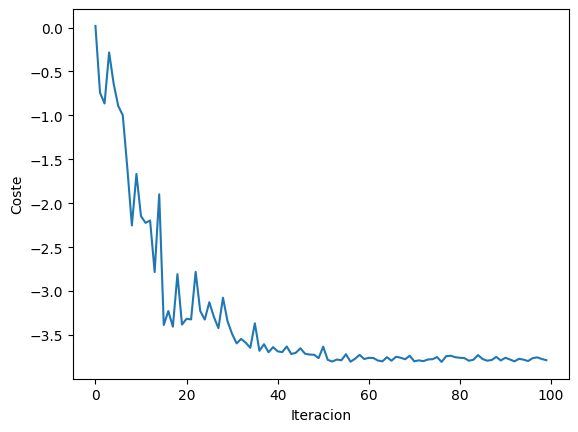

In [29]:
fig, ax = plt.subplots()
plt.plot(range(callback_dict["iters"]), callback_dict["cost_history"])
plt.xlabel("Iteracion")
plt.ylabel("Coste")
plt.draw()

🎉 Como era de esperar, nuestro algoritmo VQE minimizó la energía a lo largo de las iteraciones, hasta alcanzar el estado fundamental. ¡Ahora hemos implementado con éxito un algoritmo VQE utilizando las nuevas funcionalidades Qiskit 1.0!

¡Gracias por completar este laboratorio y buena suerte con los siguientes!

# Información adicional

**Creado por:** James Weaver, María Gragera Garcés

**Supervisado por:** Junye Huang

**Traducido por:** María Gragera Garcés

**Versión:** 1.3.0